<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# Deber Map of Science

## GBI6-2021II: BIOINFORMÁTICA

**Mendoza Poraño, Francisco Javier**

**17/2/2022**

## T5_Mapa de Ciencia

### Basado en las sesiones de Visualización de datos y Expresiones resulares. Realice una adaptación de la solución del MAP OF SCIENCE. Se requiere dos adaptaciones para resolver esta actividad:

* Buscar bibliografía de un tema de interés propio en la Página Web de PubMed,

* Realizar el minado de autores por país (en el ejemplo se encuentra realziado por las ciudades de USA). Para asignar las ubicación geográfica de los centroides de cada país (latitud y longitud), utilice la tabla  Ubicación Geográfica de Países - Google Developer. Así como en la solución de referencia se señalan varias ciudades seleccionadas de USA, en su resolución señale/resalte a los siguientes países: USA, UK, Brazil, China, Australia, Norway.  

### Cargue su cuaderno de Jupyter en GitHub, asegurandose de lo siguiente:

* en el documento se puede ver con claridad el Mapa de Ciencia de su tema de interés.

* la figura tiene etiquetas adecuadas en los ejes de la visualización. 

* se tiene al menos tres controles de la versión (3 commit con mensajes adecuados sobre la versión)

In [32]:
#Se declaran las biblioteca de los modulos de las clases usadas para abrir, leer las coordenas y graficar
import re
import csv
import matplotlib.pyplot as plt

#Se abre el archivo de busqueda en el sitio PubMed
#Link de la busqueda: https://pubmed.ncbi.nlm.nih.gov/?term=toxin+venom+scorpion
#Para ello el documento de usan todas los resultados sin restricciones, sinedo 5092
with open("pubmed-toxinvenom-set.txt", encoding="utf8") as f:
    my_text1 = f.read()
len(my_text1) 
#Se cambian los saltos de lienas por un documento seguido
my_text2 = re.sub(r'\n\s{6}', ' ', my_text1)

#Declaracion de los patrones de busqueda
#Acaban en pais de un termino
paises0 = re.findall(r'^AD |\,\s(\w*)\.\n', my_text2)
#Acaban en pais de un termino con ciudad y 2 numeros antes
paises1 = re.findall(r'^AD |\,\s\w{5}\-\d{3}\,\s\w*\s\w*\,\s\w{2}\,\s(\w{3,20})\.\n', my_text2)
#Acaban en pais de ciudades con varios terminos y 2 numeros antes
paises2 = re.findall(r'^AD |\,\s\w{5}\-\d{3}\,\s\w*\s\w*\,\s(\w{3,20})\.\n', my_text2)
#Acaban en pais de un termino con ciudad y 1 numeros antes
paises3 = re.findall(r'^AD |\,\s\d*\,\s\w*\,\s(\w*)\.\n', my_text2)
#Acaban en pais de un termino con ciudad, correo con mensaje antes y 2 numeros antes
paises4 = re.findall(r'^AD |\,\s\w{5}\-\d{3}\,\s\w*\s\w*\,\s\w{2}\,\s(\w{3,20})\. Electronic address:', my_text2)
#Acaban en pais de un termino con ciudad, correo con mensaje antes y sin numeros antes
paises5 = re.findall(r'^AD |\s\w*\,\s\w*\s\w*\,\s\w{2}\,\s(\w{3,20})\. Electronic address:', my_text2)
#Acaban en pais de un termino con ciudad, correo sin mensaje antes y 2 numeros antes
paises6 = re.findall(r'^AD |\,\s(\w*)\.\s[a-z0-9_\.-]+@[\da-z\.-]+\.[a-z\.]{2,6}\.\n', my_text2)
#Acaban en pais de dos terminos, con dos palabras alado
paises7 = re.findall(r'^AD |\w{3}\s\w{4}\,\s(\w{3,20}\s\w{3,20})\.\n', my_text2)
#Acaban en pais de dos terminos, con dos palabras alado y 1 numeros antes
paises8 = re.findall(r'^AD |\,\s\d*\,\s\w{3}\s\w{4}\,\s(\w{3,20}\s\w{3,20})\.\n', my_text2)
#Acaban en pais de dos terminos, con ciudad y 2 numeros antes
paises9 = re.findall(r'^AD |\,\s\w{5}\-\d{3}\,\s\w*\s\w*\,\s\w{2}\,\s(\w{3,20}\s\w{3,20})\.\n', my_text2)
#Acaban en pais de dos terminos con ciudades con varios terminos y 2 numeros antes
paises10 = re.findall(r'^AD |\,\s\w{5}\-\d{3}\,\s\w*\s\w*\,\s(\w{3,20}\s\w{3,20})\.\n', my_text2)
#Acaban en pais de dos terminos con ciudad y 1 numeros antes
paises11 = re.findall(r'^AD |\,\s\d*\,\s\w*\,\s(\w{3,20}\s\w{3,20})\.\n', my_text2)
#Acaban en pais de dos terminos con ciudad, correo con mensaje antes y 2 numeros antes
paises12 = re.findall(r'^AD |\,\s\w{5}\-\d{3}\,\s\w*\s\w*\,\s\w{2}\,\s(\w{3,20}\s\w{3,20})\. Electronic address:', my_text2)
#Acaban en pais de dos terminos con ciudad, correo con mensaje antes y sin numeros antes
paises13 = re.findall(r'^AD |\s\w*\,\s\w*\s\w*\,\s\w{2}\,\s(\w{3,20}\s\w{3,20})\. Electronic address:', my_text2)
#Acaban en pais de dos terminos con ciudad, correo sin mensaje antes y 2 numeros antes
paises14 = re.findall(r'^AD |\,\s(\w{3,20}\s\w{3,20})\.\s[a-z0-9_\.-]+@[\da-z\.-]+\.[a-z\.]{2,6}\.\n', my_text2)
#Acaban en pais con parentesus al final
paises15 = re.findall(r'^AD |\,\s(\w{3,20})\s\(\w*\.\w*\.\)\.\n', my_text2)
#Acaban en pais de un termino con digitos y letras alado
paises16 = re.findall(r'^AD |\,\d*\s\w{4,20}\,\s(\w{3,20})\.\n', my_text2)
#Acaban en pais de un termino de letras y digitos alado
paises17 = re.findall(r'^AD |\,\w{4,20}\s\d*\,\s(\w{3,20})\.\n', my_text2)
##Acaban en pais de un termino ISNI
paises18 = re.findall(r'^AD |\,\d*\s(\w{3,20})\. ISNI:\d*', my_text2)

#Debido a la inmensa cantidad de patrones solo se tomaron los mas importantes y se sumaron para crear una sola lista
paisesT = paises0+ paises1 + paises2+ paises3+ paises4+ paises5+ paises6+ paises7+ paises8+ paises9+ paises10+ paises11+ paises12+ paises13+ paises14+ paises15+ paises16+ paises17+ paises18
#print(paisesT)

In [33]:
#Creacion y ordenamiento de la lista de paises, para posteriormente hacerlos unicos y contarlos en el ciclo if 
len(paisesT)
print(paisesT[:10])
unique_paisesT = list(set(paisesT))
unique_paisesT.sort()
unique_paisesT[:10]
len(unique_paisesT)

['Australia', 'Australia', 'Mexico', 'Mexico', 'Mexico', 'Mexico', 'Mexico', 'Pakistan', 'Pakistan', 'Pakistan']


152

In [34]:
#Se crea el diccionario que alberge los datos de las coordenadas para su posterior evaluacion en un ciclo if
DatosPaises = {}
#Para esto se abre un nuevo documento de texto que alberga las coordenadas 
#Este proceso se hace con la clase csv
with open('DatosPaises.txt') as f:
    csvr = csv.DictReader(f)
    for row in csvr:
        DatosPaises[row['Name']] = [row['Latitude'], row['Longitude']]
        #print(row['Country'], row['Latitude'], row['Longitude'], row['Name'])
#print(DatosPaises)

In [35]:
#Esta parte ayuda a que se distribuyan los paises antes enlistados, esto se hace con un append y se los distribuye con su values y keys 
name = []
longitude = []
latitude = []
count = []
for z in unique_paisesT:
    #print(z)
    if z in DatosPaises.keys():
        name.append(z)
        latitude.append(float(DatosPaises[z][0]))
        longitude.append(float(DatosPaises[z][1]))
        count.append(paisesT.count(z))
print("Los paises son: ", name)
print("\n\nLos 10 primeros paises son: ", name[:10])
print("\n\nEl valor del contador por país es: ", count)
print("\n\nLa longitud de los países contados es: ", longitude)
print("\n\nLa longitud de los países contados  es: ", latitude)

Los paises son:  ['Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bangladesh', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Cuba', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt', 'Finland', 'France', 'Germany', 'Ghana', 'Guyana', 'Hungary', 'India', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Lebanon', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Russia', 'Serbia', 'Singapore', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Tunisia', 'Turkey', 'UK', 'USA', 'Ukraine', 'Uruguay', 'Venezuela', 'Vietnam']


Los 10 primeros paises son:  ['Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bangladesh', 'Belgium', 'Brazil', 'Canada', 'Chile']


El valor del contador por país es:  [140, 36, 2, 255, 34, 1, 186, 987, 130, 28, 1728, 66, 16, 26, 1, 58, 12, 50, 2, 601, 215, 2, 2

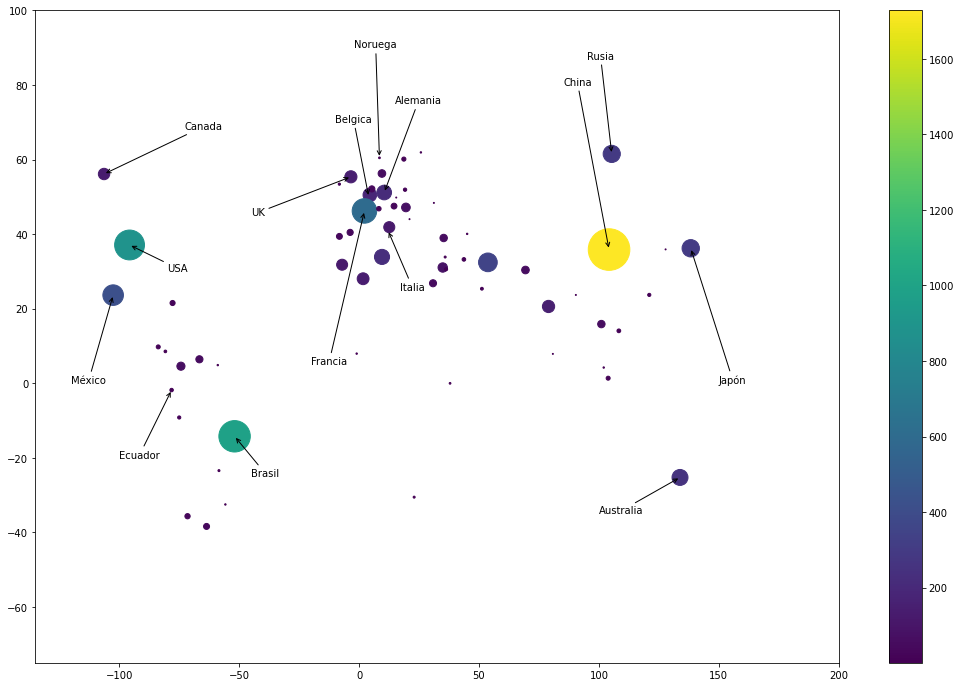

In [37]:
#Incicia la generaicon de gracias con la biblioteca matplotlib
%matplotlib inline
#Declaracion de las listas de interes en torno a los paises encontrados
plt.scatter(longitude, latitude, s = count, c= count)
plt.colorbar()
# Coordenadas del mapa de solucion
plt.xlim(-135,200)
plt.ylim(-75,100)
 
# Algunos de los paisses de referencia con mas busquedas
ard = dict(arrowstyle="->")
plt.annotate('Brasil', xy = (-51.92528,-14.235004),
               xytext = (-45,-25), arrowprops = ard)
plt.annotate('Belgica', xy = (4, 50), 
               xytext = (-10, 70), arrowprops= ard)
plt.annotate('Canada', xy = (-106.346771, 56.130366), 
               xytext = (-73, 68), arrowprops= ard)
plt.annotate('China', xy = (104.195397, 35.86166), 
               xytext = (85, 80), arrowprops= ard)
plt.annotate('Australia', xy = (133.775136, -25.274398), 
               xytext = (100, -35), arrowprops= ard)
plt.annotate('Italia', xy = (12, 41), 
               xytext = (17, 25), arrowprops= ard)
plt.annotate('Ecuador', xy = (-78.183406, -1.831239), 
               xytext = (-100, -20), arrowprops= ard)
plt.annotate('Francia', xy = (2.213749, 46.227638), 
               xytext = (-20, 5), arrowprops= ard)
plt.annotate('Alemania', xy = (10.451526, 51.165691), 
               xytext = (15, 75), arrowprops= ard)
plt.annotate('México', xy = (-102.552784, 23.634501), 
               xytext = (-120, 0), arrowprops= ard)
plt.annotate('Rusia', xy = (105.318756, 61.52401), 
               xytext = (95, 87), arrowprops= ard)
plt.annotate('Japón', xy = (138.252924, 36.204824), 
               xytext = (150, 0), arrowprops= ard)
plt.annotate('USA', xy = (-95.712, 37.09024), 
               xytext = (-80, 30), arrowprops= ard)
plt.annotate('Noruega', xy = (8.468946, 60.472024), 
               xytext = (-2, 90), arrowprops= ard)
plt.annotate('UK', xy = (-3.435973, 55.378051), 
               xytext = (-45, 45), arrowprops= ard)
#Parametros de visualizaicon
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show()